In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=fb677b1afe0107995a4764347f92c49982c260396302bd175ee2d00c336be1f3
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
%matplotlib inline
from tensorflow.keras.layers import TextVectorization
from sklearn.cluster import KMeans


In [ ]:
posts = pd.read_csv('posts.csv')
users = pd.read_csv('users.csv')

print(posts.head())
print(users.head())

   id     title          image            description    type    status  \
0   1  Rak Buku  rak buku1.jpg  Sebuah Rak Buku bekas  Barang   Selesai   
1   2  Rak Buku  rak buku2.jpg  Sebuah Rak Buku bekas  Barang   Selesai   
2   3  Rak Buku  rak buku3.jpg  Sebuah Rak Buku bekas  Barang  Tersedia   
3   4    Lemari    lemari1.jpg    Sebuah Lemari bekas  Barang   Selesai   
4   5    Lemari    lemari2.jpg    Sebuah Lemari bekas  Barang  Tersedia   

            created_at           updated_at  user_id  
0  2024-06-06 09:50:57  2024-06-06 14:50:57      180  
1  2024-05-24 08:36:06  2024-05-24 09:36:06      187  
2  2024-05-26 13:16:33  2024-05-26 23:16:33      275  
3  2024-05-31 17:35:32  2024-05-31 22:35:32      276  
4  2024-06-05 09:03:25  2024-06-05 11:03:25       72  
   id username password           city
0   1    user1    pass1       Bengkulu
1   2    user2    pass2          Ambon
2   3    user3    pass3       Bengkulu
3   4    user4    pass4         Mamuju
4   5    user5    pass5 

In [ ]:
merged_data = pd.merge(posts, users, on='id')
print(merged_data.head())

   id     title          image            description    type    status  \
0   1  Rak Buku  rak buku1.jpg  Sebuah Rak Buku bekas  Barang   Selesai   
1   2  Rak Buku  rak buku2.jpg  Sebuah Rak Buku bekas  Barang   Selesai   
2   3  Rak Buku  rak buku3.jpg  Sebuah Rak Buku bekas  Barang  Tersedia   
3   4    Lemari    lemari1.jpg    Sebuah Lemari bekas  Barang   Selesai   
4   5    Lemari    lemari2.jpg    Sebuah Lemari bekas  Barang  Tersedia   

            created_at           updated_at  user_id username password  \
0  2024-06-06 09:50:57  2024-06-06 14:50:57      180    user1    pass1   
1  2024-05-24 08:36:06  2024-05-24 09:36:06      187    user2    pass2   
2  2024-05-26 13:16:33  2024-05-26 23:16:33      275    user3    pass3   
3  2024-05-31 17:35:32  2024-05-31 22:35:32      276    user4    pass4   
4  2024-06-05 09:03:25  2024-06-05 11:03:25       72    user5    pass5   

            city  
0       Bengkulu  
1          Ambon  
2       Bengkulu  
3         Mamuju  
4  Tanjun

In [ ]:
cities = merged_data['city'].astype(str).values


vectorizer = TextVectorization(output_mode='multi_hot')
vectorizer.adapt(cities)
vectorized_cities = vectorizer(cities)


vectorized_cities = vectorized_cities.numpy()


In [ ]:

num_clusters = len(np.unique(cities))


kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(vectorized_cities)


labels = kmeans.labels_


merged_data['cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
print(num_clusters)

38


In [ ]:

from sklearn.decomposition import PCA
import plotly.express as px


pca = PCA(n_components=2)
principal_components = pca.fit_transform(vectorized_cities)


merged_data['pc1'] = principal_components[:, 0]
merged_data['pc2'] = principal_components[:, 1]


fig = px.scatter(
    merged_data, x='pc1', y='pc2',
    color='cluster',
    hover_data=['title', 'description', 'type', 'status', 'created_at', 'updated_at', 'user_id', 'city'],
    title='K-means Clustering of Posts',
    labels={'pc1': 'Principal Component 1', 'pc2': 'Principal Component 2'}
)


fig.show()

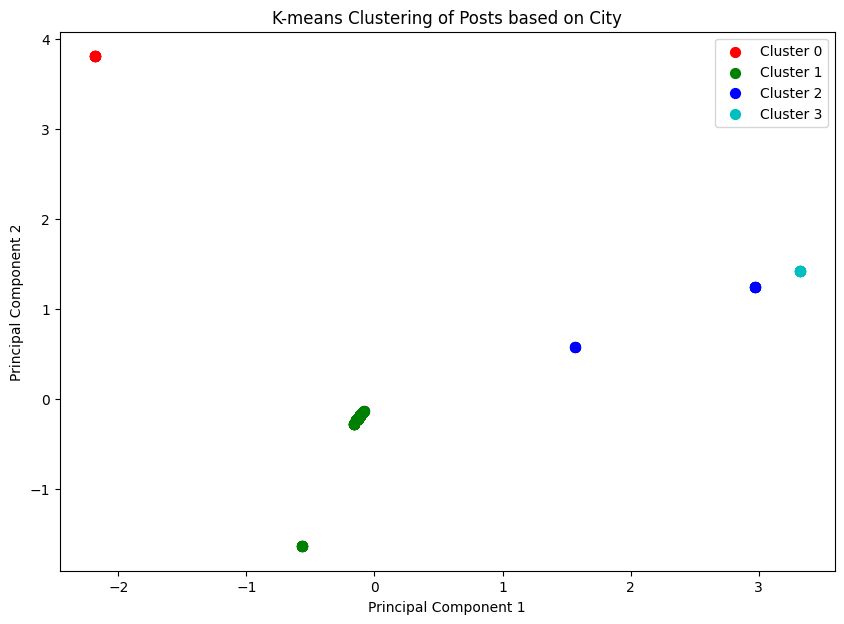

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
principal_components = pca.fit_transform(vectorized_cities)


merged_data['pc1'] = principal_components[:, 0]
merged_data['pc2'] = principal_components[:, 1]


plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'c', 'm']

for i in range(num_clusters):
    cluster_data = merged_data[merged_data['cluster'] == i]
    plt.scatter(cluster_data['pc1'], cluster_data['pc2'], s=50, c=colors[i], label=f'Cluster {i}')


#centroids = pca.transform(kmeans.cluster_centers_)
#plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='X', edgecolor='k', label='Centroids')

plt.title('K-means Clustering of Posts based on City')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()